<a href="https://colab.research.google.com/github/theyashmishra/automated-essay-grading/blob/main/Automated_Essay_grading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task is to predict scores of the given essays by their content .
This task Requires bth NLP and Supervised learning, NLP for text preprocessing and supervised learning for prediction

In [178]:
#importing all neccesary files related to NLP , Data visualization, Predicton ,
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import re, collections
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV


In [179]:
#reading train Data and encoding in latin english(latin-1)
dataframe = pd.read_csv('train.csv', encoding = 'latin-1')
#removing extra columns
dataframe.drop(['Unnamed: 0'],axis=1,inplace=True)
dataframe.dropna(axis=0,inplace=True)

In [180]:
dataframe.head()

,promptId,uniqueId,essay,evaluator_rating
0,1,1_323,"At present age, our education system is not go...",3.0
1,1,1_238,I am agree the tightly defined curriculum of o...,4.0
2,1,1_212,I strongly agree with the statement that tight...,2.0
3,1,1_117,Our education system is nice quitely but i dis...,2.0
4,1,1_229,i am totally agree with the statement that tig...,3.0


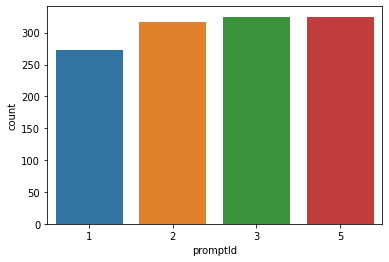

In [275]:
# bar graph for each type of essays
sns.countplot(x="promptId", data=dataframe)

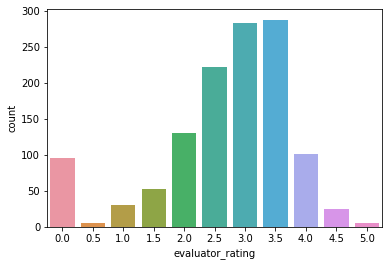

In [182]:
sns.countplot(x="evaluator_rating", data=dataframe)

In [183]:
#make a seprate copy of our dataframe for further experiments
data = dataframe[['promptId','essay','evaluator_rating']].copy()

Text preprocessing


In [184]:
#convert text to sentence
def sentence_to_wordlist(raw_sentence):
    
    clean_sentence = re.sub("[^a-zA-Z0-9]"," ", raw_sentence)
    tokens = nltk.word_tokenize(clean_sentence)
    
    return tokens

In [185]:
#convert word to tokens
def tokenize(essay):
    stripped_essay = essay.strip()
    
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    raw_sentences = tokenizer.tokenize(stripped_essay)
    
    tokenized_sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            tokenized_sentences.append(sentence_to_wordlist(raw_sentence))
    
    return tokenized_sentences

In [203]:
# converting it into vectors
def get_count_vectors(essays):
    
    vectorizer = CountVectorizer(max_features = 10000, ngram_range=(1, 3), stop_words='english')
    
    count_vectors = vectorizer.fit_transform(essays)
    
    feature_names = vectorizer.get_feature_names()
    
    return feature_names, count_vectors

In [191]:
# used for standardization of results
def func(lis):

  for i in range(0,len(lis)):
    if lis[i]<0.25:
     lis[i]=0
    elif lis[i]<0.75:
     lis[i]=0.5
    elif lis[i]<1.25:
     lis[i]=1 
    elif lis[i]<1.75:
     lis[i]=1.5
    elif lis[i]<2.25:
     lis[i]=2 
    elif lis[i]<2.75:
     lis[i]=2.5
    elif lis[i]<3.25:
     lis[i]=3 
    elif lis[i]<3.75:
     lis[i]=3.5
    elif lis[i]<4.25:
     lis[i]=4
    elif lis[i]<4.75:
     lis[i]=4.5
    elif lis[i]<5.25:
     lis[i]=5
    else:
     lis[i]=5   

I have tried all classification models but they failed to give fair results whereas regression algorithms are suprisingly give better results then classification models and among all of them random forest works well

In [199]:
# model for essays of set 1

feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 1]['essay'])

X_cv = count_vectors.toarray()

y_cv = data[data['promptId'] == 1]['evaluator_rating'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
clf = RandomForestRegressor(n_estimators=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
func(y_pred)
# printing MSE and clf score
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

clf.score(X_test,y_test)


Mean squared error: 1.23


0.2527271882549712

In [193]:
# model for essays of set 2

feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 2]['essay'])

X_cv = count_vectors.toarray()

y_cv = data[data['promptId'] == 2]['evaluator_rating'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
clf = RandomForestRegressor(n_estimators=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
func(y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

clf.score(X_test,y_test)


Mean squared error: 0.69


0.08977615349474644

In [194]:
# model for essays of set 3
feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 3]['essay'])

X_cv = count_vectors.toarray()

y_cv = data[data['promptId'] == 3]['evaluator_rating'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
clf = RandomForestRegressor(n_estimators=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
func(y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

clf.score(X_test,y_test)


Mean squared error: 0.58


-0.31463414634146325

In [205]:
# model for essays of set 5
feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 5]['essay'])

X_cv = count_vectors.toarray()

y_cv = data[data['promptId'] == 5]['evaluator_rating'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
clf = RandomForestRegressor(n_estimators=10)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
func(y_pred)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

clf.score(X_test,y_test)


Mean squared error: 1.36


0.002813543880959335

Testing on our dataset(test_csv)

In [207]:
#reading test data
test_dataframe=pd.read_csv('test.csv', encoding = 'latin-1')
test_dataframe.drop(['Unnamed: 0'],axis=1,inplace=True)
test_dataframe.dropna(axis=0,inplace=True)
test_dataframe.head()

,promptId,uniqueId,essay
0,1,1_315,Curriculum has been adopted in many schools. T...
1,1,1_214,"I strongly agree with the statement , The tig..."
2,1,1_196,Imagination and creativity is the most importa...
3,1,1_178,In our eduction system leaves no room for imag...
4,1,1_201,"I will agree at some what extend, because if w..."


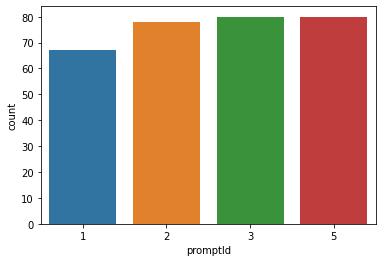

In [209]:
sns.countplot(x="promptId", data=test_dataframe)

In [214]:
test_data = test_dataframe[['promptId','essay']].copy()

We are working with diffrent models for diffrent essay set so I append all predictions in the list and appended in test_prediction file

In [247]:
#prediction for essay set 1
 l=[]
feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 1]['essay'])

X_cv = count_vectors.toarray()
y_pred_1 = clf.predict(X_cv)
func(y_pred_1)
l.append(y_pred_1)

In [249]:
#prediction for essay set 2 
feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 2]['essay'])

X_cv = count_vectors.toarray()
y_pred_2 = clf.predict(X_cv)
func(y_pred_2)
l.append(y_pred_2)

In [251]:
#prediction for essay set 3
feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 3]['essay'])

X_cv = count_vectors.toarray()
y_pred_3 = clf.predict(X_cv
                       )
func(y_pred_3)
l.append(y_pred_3)

In [255]:
#prediction for essay set 5
feature_names_cv, count_vectors = get_count_vectors(data[data['promptId'] == 5]['essay'])

X_cv = count_vectors.toarray()
y_pred_5 = clf.predict(X_cv)
func(y_pred_5)
l.append(y_pred_5)

In [262]:
score=np.asarray(l)

In [272]:
test_dataframe['score']=score

In [273]:
test_dataframe

,promptId,uniqueId,essay,score
0,1,1_315,Curriculum has been adopted in many schools. T...,3.0
1,1,1_214,"I strongly agree with the statement , The tig...",2.5
2,1,1_196,Imagination and creativity is the most importa...,2.5
3,1,1_178,In our eduction system leaves no room for imag...,2.0
4,1,1_201,"I will agree at some what extend, because if w...",3.0
...,...,...,...,...
300,5,5_146,Earth is a creation of God and everything that...,2.0
301,5,5_65,production of arms and weapons in this present...,2.0
302,5,5_151,Race to become more powerful can destroy the e...,3.5
303,5,5_404,In its attempt to harness the power of the ato...,3.0


After making all the predictions I saved the results in test prediction.csv

In [274]:
test_dataframe.to_csv('test_prediction.csv')